<a href="https://colab.research.google.com/github/teonakuzmanovska/Data-Science/blob/master/kaggle_datasets/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Midterm exercise
Requirement: use backward fill for handling the missing values and decision tree classifier with max depth 15

In [98]:
!gdown 1rkN2eHQmUh6ZtIUB0pz_VEFMIhk1c7lW # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1rkN2eHQmUh6ZtIUB0pz_VEFMIhk1c7lW
To: /content/water-potability.csv
100% 525k/525k [00:00<00:00, 6.02MB/s]


In [99]:
import pandas as pd

In [100]:
df = pd.read_csv('/content/water-potability.csv')

In [101]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [102]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

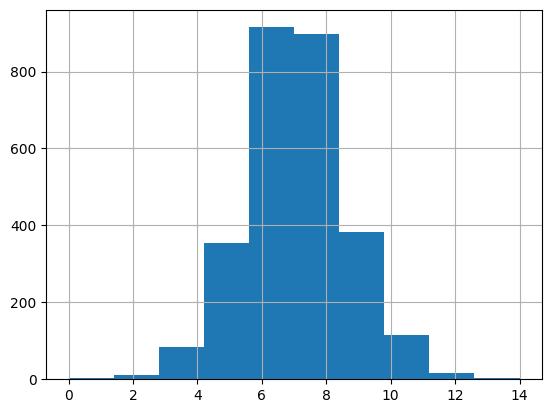

In [103]:
df.ph.hist()

<Axes: >

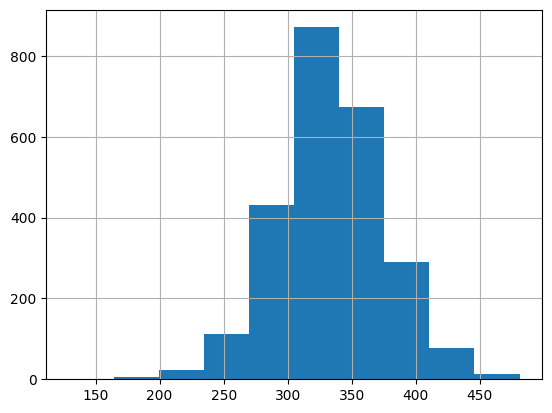

In [104]:
df.Sulfate.hist()

<Axes: >

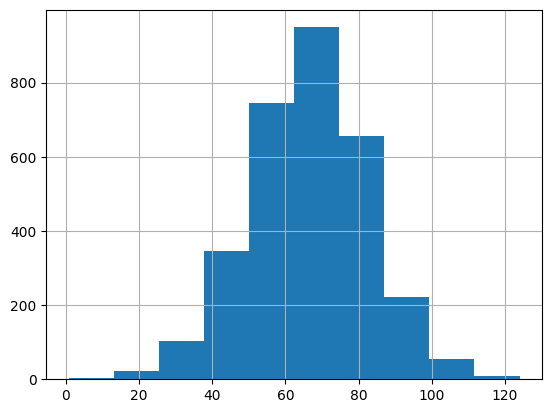

In [105]:
df.Trihalomethanes.hist()

In [106]:
df.ph = df.ph.fillna(method='bfill')

In [107]:
df.Sulfate = df.ph.fillna(method='bfill')

In [108]:
df.Trihalomethanes = df.ph.fillna(method='bfill')

In [109]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [110]:
X = df.drop('Potability', axis = 1)

In [111]:
y = df.Potability

In [112]:
X

ph    Hardness        Solids  Chloramines   Sulfate  Conductivity  \
0     3.716080  204.890455  20791.318981     7.300212  3.716080    564.308654   
1     3.716080  129.422921  18630.057858     6.635246  3.716080    592.885359   
2     8.099124  224.236259  19909.541732     9.275884  8.099124    418.606213   
3     8.316766  214.373394  22018.417441     8.059332  8.316766    363.266516   
4     9.092223  181.101509  17978.986339     6.546600  9.092223    398.410813   
...        ...         ...           ...          ...       ...           ...   
3271  4.668102  193.681735  47580.991603     7.166639  4.668102    526.424171   
3272  7.808856  193.553212  17329.802160     8.061362  7.808856    392.449580   
3273  9.419510  175.762646  33155.578218     7.350233  9.419510    432.044783   
3274  5.126763  230.603758  11983.869376     6.303357  5.126763    402.883113   
3275  7.874671  195.102299  17404.177061     7.509306  7.874671    327.459760   

      Organic_carbon  Trihalomethanes  Turbidity  
0          10.379783         3.716080   2.963135  
1          15.180013         3.716080   4.500656  
2          16.868637         8.099124   3.055934  
3          18.436524         8.316766   4.628771  
4          11.558279         9.092223   4.075075  
...              ...              ...        ...  
3271       13.894419         4.668102   4.435821  
3272       19.903225         7.808856   2.798243  
3273       11.039070         9.419510   3.298875  
3274       11.168946         5.126763   4.708658  
3275       16.140368         7.874671   2.309149  

[3276 rows x 9 columns]

In [113]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()

Note: always scale only X set, never y !

In [118]:
X_train = scaler.fit_transform(X_train)

In [119]:
X_test = scaler.fit_transform(X_test)

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
decision_train = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)

In [122]:
y_pred = decision_train.predict(X_test)

In [123]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report

In [124]:
f1_score(y_test, y_pred, average='micro')

0.57997557997558

In [125]:
f1_score(y_test, y_pred, average='macro')

0.5371969248965109

In [126]:
confusion_matrix(y_test, y_pred)

array([[362, 148],
       [196, 113]])

In [127]:
accuracy_score(y_test, y_pred)

0.57997557997558

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       510
           1       0.43      0.37      0.40       309

    accuracy                           0.58       819
   macro avg       0.54      0.54      0.54       819
weighted avg       0.57      0.58      0.57       819



In [129]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(decision_train, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())